## Configuración y datos experimentales 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import random
import re
import os
import csv

#### Algunas funciones para reutilizar código

In [2]:
import os
import numpy as np

def save_filtered_data_all(file_list, charge_range, output_dir):
    """
    Filters and saves segmented data from input files based on a charge range.
    Args:
        file_list (list of str): A list containing two file paths. The first file is assumed to be the source data (fuente) 
                                 and the second file is the background data (fondo).
        charge_range (tuple of int): A tuple containing two integers that define the lower and upper bounds of the charge range.
        output_dir (str): The directory where the filtered data will be saved.
    Returns:
        None
    The function reads data from the provided files, segments it into chunks of 32, filters these segments based on the 
    provided charge range, and saves the filtered segments into CSV files in the specified output directory. The source 
    data is saved as "fuente_pulsos.csv" and the background data is saved as "fondo_pulsos.csv".
    """
    fuente_data, fondo_data = [], []
    fuente_file, fondo_file = file_list
    for file, data_list in zip([fuente_file, fondo_file], [fuente_data, fondo_data]):
        data = np.loadtxt(file, np.int32, usecols=0)
        num_segments = len(data) // 32
        new_data = data[:num_segments * 32].reshape(-1, 32)

        for subsegment in new_data:
            if charge_range[0] < np.sum(subsegment) < charge_range[1]:
                data_list.append(subsegment)
        
    # Guardar los resultados en el directorio de salida
    os.makedirs(output_dir, exist_ok=True)
    if fuente_data:
        np.savetxt(os.path.join(output_dir, "fuente_pulsos.csv"), np.array(fuente_data), delimiter=',', fmt='%d')
    if fondo_data:
        np.savetxt(os.path.join(output_dir, "fondo_pulsos.csv"), np.array(fondo_data), delimiter=',', fmt='%d')
    
    print(f"Datos guardados en {output_dir}")

In [3]:
import os
import numpy as np
import random

def save_filtered_data_random(file_list, charge_range, output_dir, sample_size):
    """
    Filters and saves random samples of data segments based on a charge range.
    Parameters:
    file_list (list of str): List containing the paths to the source and background data files.
    charge_range (tuple of int): Tuple specifying the minimum and maximum charge range for filtering segments.
    output_dir (str): Directory where the filtered data will be saved.
    sample_size (int): Number of samples to randomly select from the filtered data.
    Returns:
    None
    The function reads data from the provided files, filters the segments based on the specified charge range,
    randomly samples the filtered segments, and saves the results to the specified output directory.
    """
    fuente_data, fondo_data = [], []
    fuente_file, fondo_file = file_list
    for file, data_list in zip([fuente_file, fondo_file], [fuente_data, fondo_data]):
        data = np.loadtxt(file, np.int32, usecols=0)
        num_segments = len(data) // 32
        new_data = data[:num_segments * 32].reshape(-1, 32)

        for subsegment in new_data:
            if charge_range[0] < np.sum(subsegment) < charge_range[1]: 
                data_list.append(subsegment)
        
    # Si el tamaño de la muestra es mayor que los datos disponibles, se usa todo el conjunto
    fuente_sample = random.sample(fuente_data, min(sample_size, len(fuente_data)))
    fondo_sample = random.sample(fondo_data, min(sample_size, len(fondo_data)))

    # Guardar los resultados en el directorio de salida
    os.makedirs(output_dir, exist_ok=True)
    if fuente_sample:
        np.savetxt(os.path.join(output_dir, "fuente_pulsos.csv"), np.array(fuente_sample), delimiter=',', fmt='%d')
    if fondo_sample:
        np.savetxt(os.path.join(output_dir, "fondo_pulsos.csv"), np.array(fondo_sample), delimiter=',', fmt='%d')
    
    print(f"Datos guardados en {output_dir}")

#### Archivos obtenidos con `download_files.py` (Ver `README.md`)

In [4]:
file_list_AmBe_desnuda = sorted(glob.glob('AmBe/*desnuda*'))
file_list_AmBe_plomo = sorted(glob.glob('AmBe/*plomo(10cm)*'))
file_list_AmBe_cdparafinab = sorted(glob.glob('AmBe/*cdparafb*'))

### Fuente AmBe desnuda (neutrones + gamma)

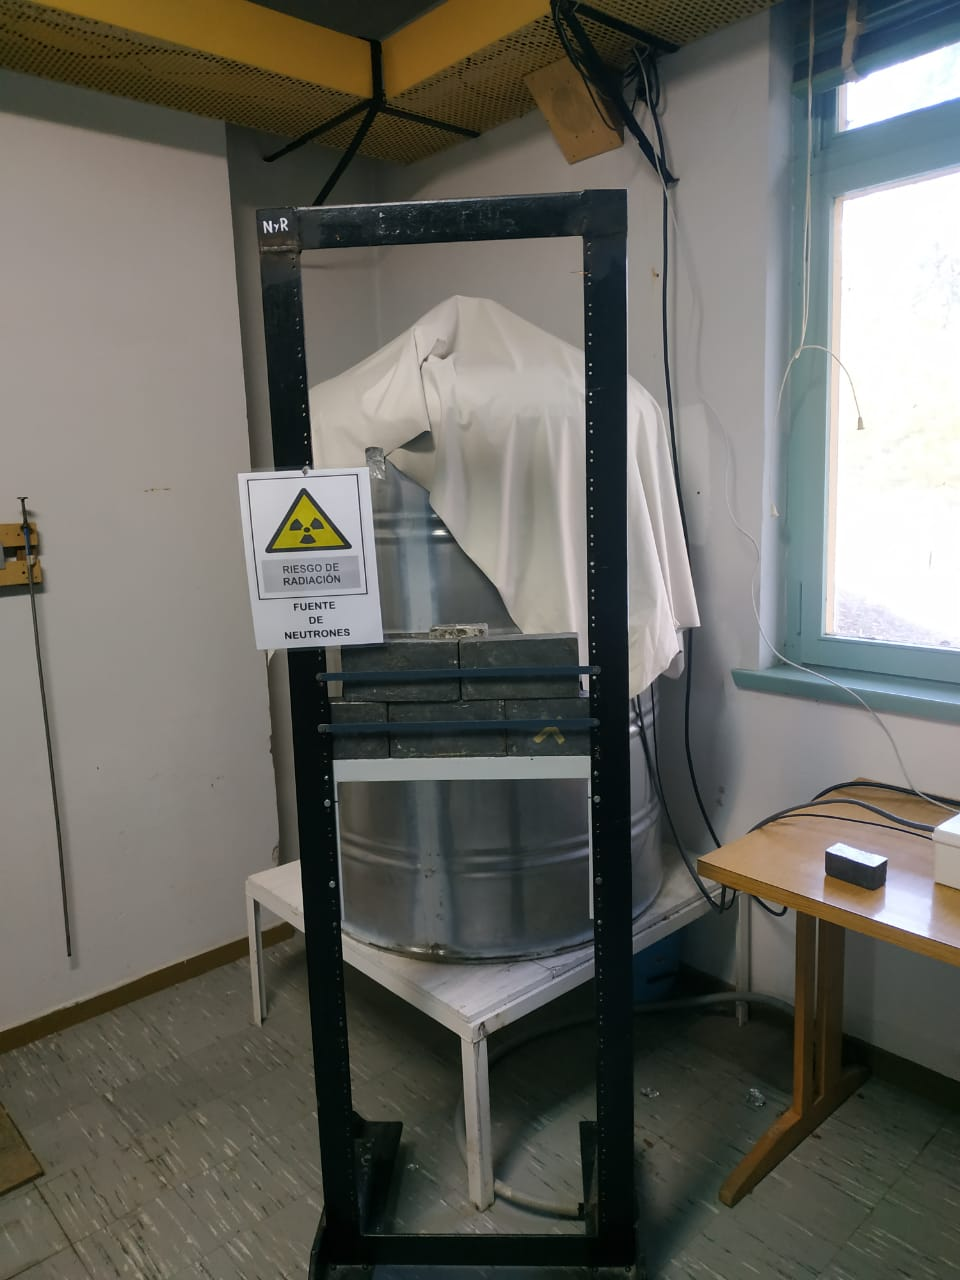

In [5]:
from IPython.display import Image

image_path = 'imgs/desnuda.jpg'

display(Image(filename=image_path, width=300, height=300))

In [6]:
# Un rango del histograma de carga
charge_thresholds_AmBe = (4000, 8000) 

In [7]:
# Una muestra aleatoria del intervalo de carga
save_filtered_data_random(file_list_AmBe_desnuda, charge_thresholds_AmBe, "AmBe_desnuda_random", 100000)
# Todo el intervalo de carga
save_filtered_data_all(file_list_AmBe_desnuda, charge_thresholds_AmBe, "AmBe_desnuda")

Datos guardados en AmBe_desnuda_random
Datos guardados en AmBe_desnuda


### Fuente AmBe con blindaje Plomo (neutrones)

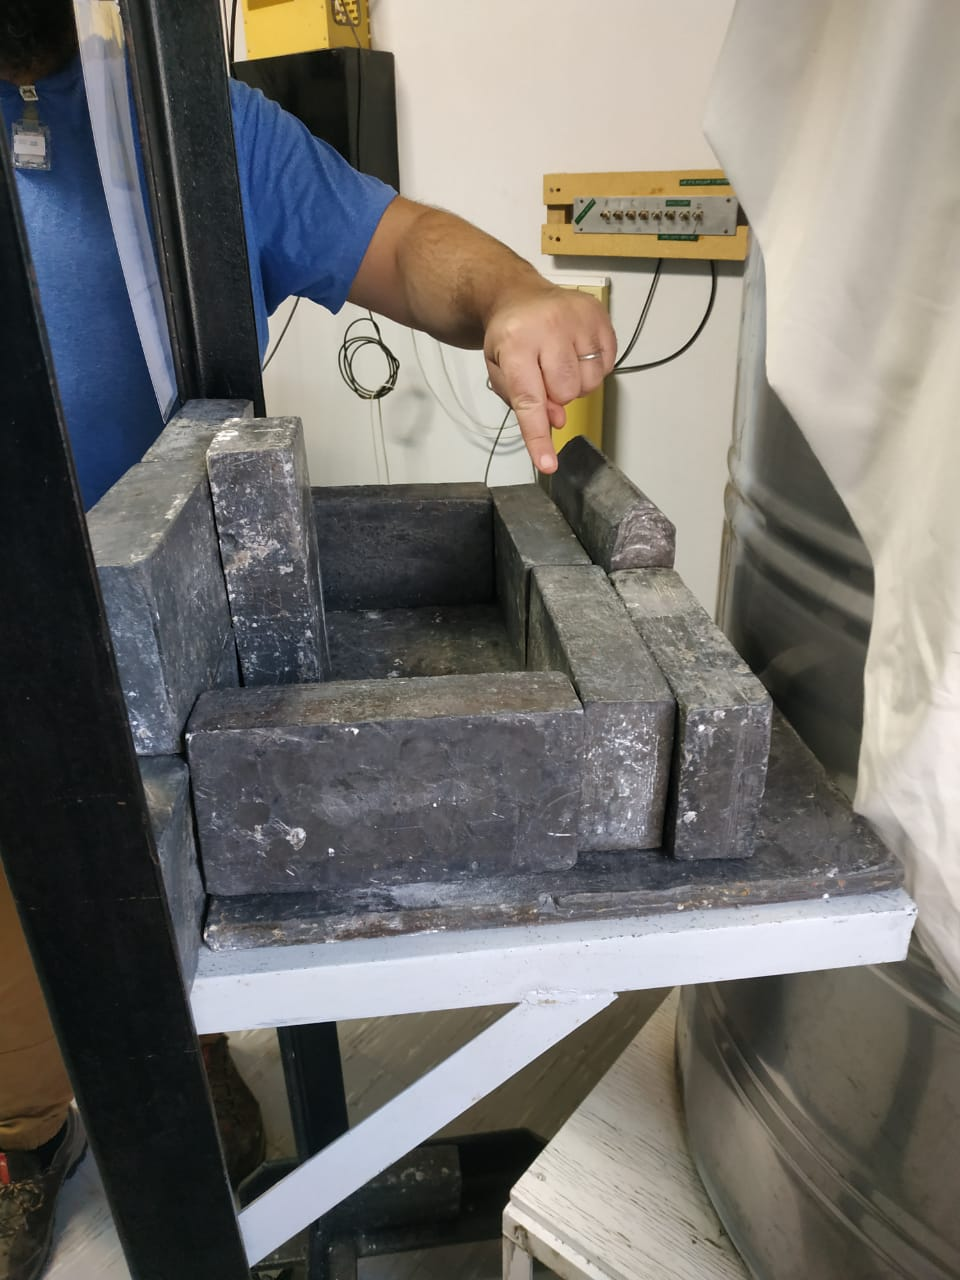

In [8]:
from IPython.display import Image

image_path = 'imgs/plomo.jpg'

display(Image(filename=image_path, width=300, height=300))

In [9]:
# Una muestra aleatoria del intervalo de carga
save_filtered_data_random(file_list_AmBe_plomo, charge_thresholds_AmBe, "AmBe_plomo_random", 100000) 
# Todo el intervalo de carga
save_filtered_data_all(file_list_AmBe_plomo, charge_thresholds_AmBe, "AmBe_plomo") 

Datos guardados en AmBe_plomo_random
Datos guardados en AmBe_plomo


### Fuente AmBe con blidaje Parafina Borada + Cadmio (gammas)

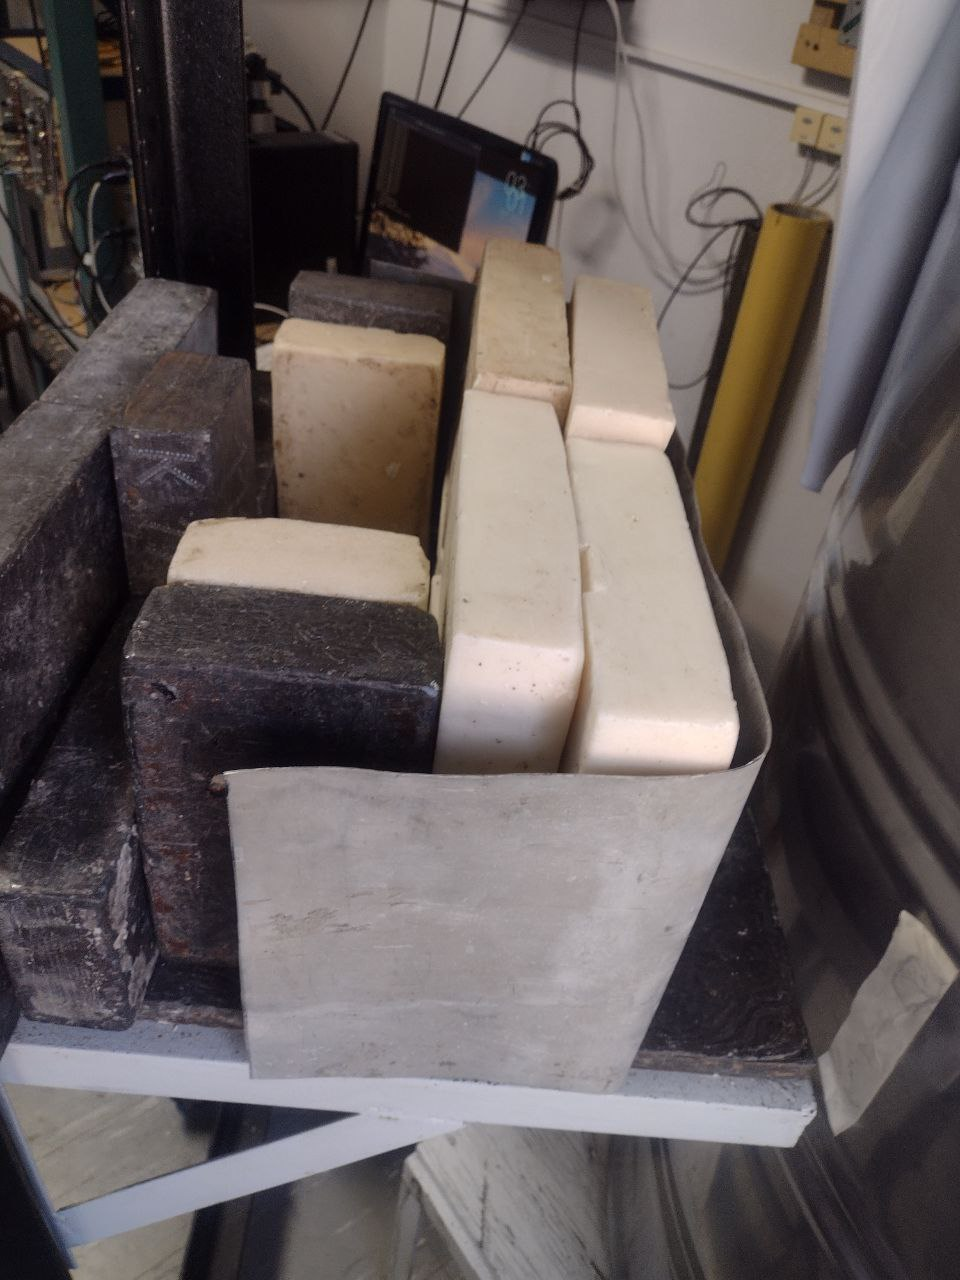

In [10]:
from IPython.display import Image

image_path = 'imgs/cdpb.jpg'

display(Image(filename=image_path, width=300, height=300))

In [11]:
# Una muestra aleatoria del intervalo de carga
save_filtered_data_random(file_list_AmBe_cdparafinab, charge_thresholds_AmBe, "AmBe_cdparafinab_random", 100000)
save_filtered_data_all(file_list_AmBe_cdparafinab, charge_thresholds_AmBe, "AmBe_cdparafinab") # Todo el intervalo de carga

Datos guardados en AmBe_cdparafinab_random
Datos guardados en AmBe_cdparafinab


## Análisis exploratorio de los datos

In [12]:
import numpy as np
import glob
import os

# Función para contar eventos en archivos de fuente y fondo
def count_events_in_directory(directory):
    """
    Counts the number of events in 'fuente_pulsos.csv' and 'fondo_pulsos.csv' files within a given directory.
    Parameters:
    directory (str): The path to the directory containing the CSV files.
    Returns:
    tuple: A tuple containing three integers:
        - fuente_count (int): The number of events in 'fuente_pulsos.csv'.
        - fondo_count (int): The number of events in 'fondo_pulsos.csv'.
        - difference (int): The difference between fuente_count and fondo_count.
    """
    fuente_file = os.path.join(directory, "fuente_pulsos.csv")
    fondo_file = os.path.join(directory, "fondo_pulsos.csv")
    
    fuente_count = 0
    fondo_count = 0
    
    # Contar eventos de fuente si el archivo existe
    if os.path.exists(fuente_file):
        fuente_data = np.loadtxt(fuente_file, delimiter=',', dtype=np.int32)
        fuente_count = fuente_data.shape[0]  # Número de filas, cada una representa un evento de fuente

    # Contar eventos de fondo si el archivo existe
    if os.path.exists(fondo_file):
        fondo_data = np.loadtxt(fondo_file, delimiter=',', dtype=np.int32)
        fondo_count = fondo_data.shape[0]  # Número de filas, cada una representa un evento de fondo

    return fuente_count, fondo_count, fuente_count - fondo_count

# Directorios de las configuraciones
directories = [
    "AmBe_desnuda",
    "AmBe_plomo",
    "AmBe_cdparafinab"
]

# Obtener el conteo de eventos para la configuración "desnuda"
fuente_count_desnuda, fondo_count_desnuda, difference_desnuda = count_events_in_directory("AmBe_desnuda")

# Contar y mostrar los resultados para cada configuración
for directory in directories:
    fuente_count, fondo_count, difference = count_events_in_directory(directory)
    
    # Calcular el porcentaje en relación a "desnuda"
    if fuente_count_desnuda > 0:
        percentage_difference = (difference / difference_desnuda) * 100
    else:
        percentage_difference = 0  
    
    print(f"Directorio: {directory}")
    print(f"  Fuente - Fondo: {difference}")
    print(f"  Porcentaje en relación a 'desnuda': {percentage_difference:.2f}%\n")

Directorio: AmBe_desnuda
  Fuente - Fondo: 702803
  Porcentaje en relación a 'desnuda': 100.00%

Directorio: AmBe_plomo
  Fuente - Fondo: 148943
  Porcentaje en relación a 'desnuda': 21.19%

Directorio: AmBe_cdparafinab
  Fuente - Fondo: 506602
  Porcentaje en relación a 'desnuda': 72.08%



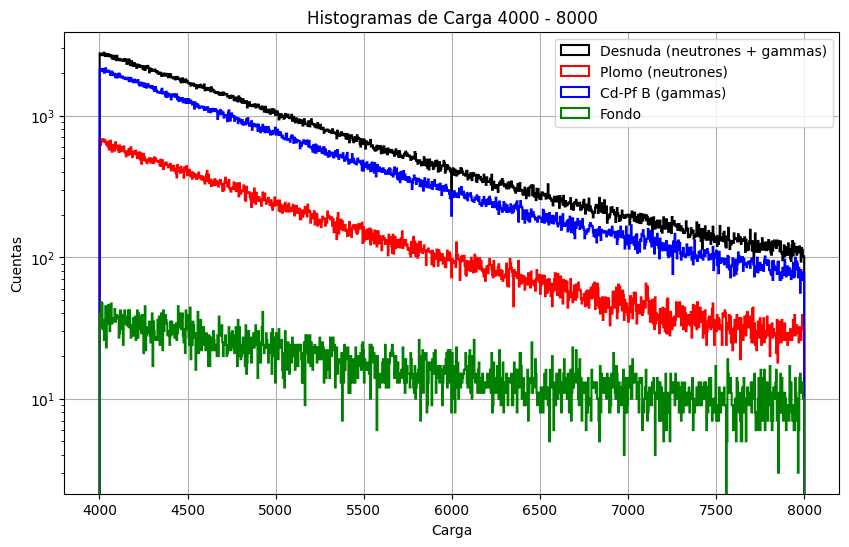

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import glob

# Función para cargar los datos de los archivos y calcular la carga
def load_and_calculate_charge_from_directory(directory):
    """
    Loads data files from a specified directory, calculates the charge for each file, 
    and returns an array of all charges.
    Args:
        directory (str): The path to the directory containing the data files.
    Returns:
        np.ndarray: An array containing the calculated charges from all files.
    Notes:
        - The function assumes that the data files are in CSV format with integer values.
        - The charge is calculated as the sum of pulses (rows) in each file.
        - The function flattens the charges from all files into a single array.
    """
    files = sorted(glob.glob(f"{directory}"))
    all_charges = []
    
    for file in files:
        data = np.loadtxt(file, delimiter=',', dtype=np.int32)
        charges = np.sum(data, axis=1)  # Calcular la carga como la suma de los pulsos
        all_charges.extend(charges)  # Aplanar y agregar a la lista
        
    return np.array(all_charges)

# Cargar las cargas de las diferentes configuraciones
fuente_charges = load_and_calculate_charge_from_directory("AmBe_desnuda/fuente_pulsos.csv")
fuente_charges_plomo = load_and_calculate_charge_from_directory("AmBe_plomo/fuente_pulsos.csv")
fuente_charges_cdparafinab = load_and_calculate_charge_from_directory("AmBe_cdparafinab/fuente_pulsos.csv")
fondo_charges = load_and_calculate_charge_from_directory("AmBe_desnuda/fondo_pulsos.csv")

# Crear el gráfico
plt.figure(figsize=(10, 6))

plt.hist(fuente_charges, bins=1000, histtype='step', linewidth=1.5, label='Desnuda (neutrones + gammas)', color='black')
plt.hist(fuente_charges_plomo, bins=1000, histtype='step', linewidth=1.5, label='Plomo (neutrones)', color='red')
plt.hist(fuente_charges_cdparafinab, bins = 1000, histtype='step', linewidth=1.5, label='Cd-Pf B (gammas)', color='blue')
plt.hist(fondo_charges, bins = 1000, histtype='step', linewidth=1.5, label='Fondo', color='green')

plt.title('Histogramas de Carga 4000 - 8000')
plt.xlabel('Carga')
plt.ylabel('Cuentas')
plt.grid()
plt.legend()
plt.yscale('log')
plt.show()

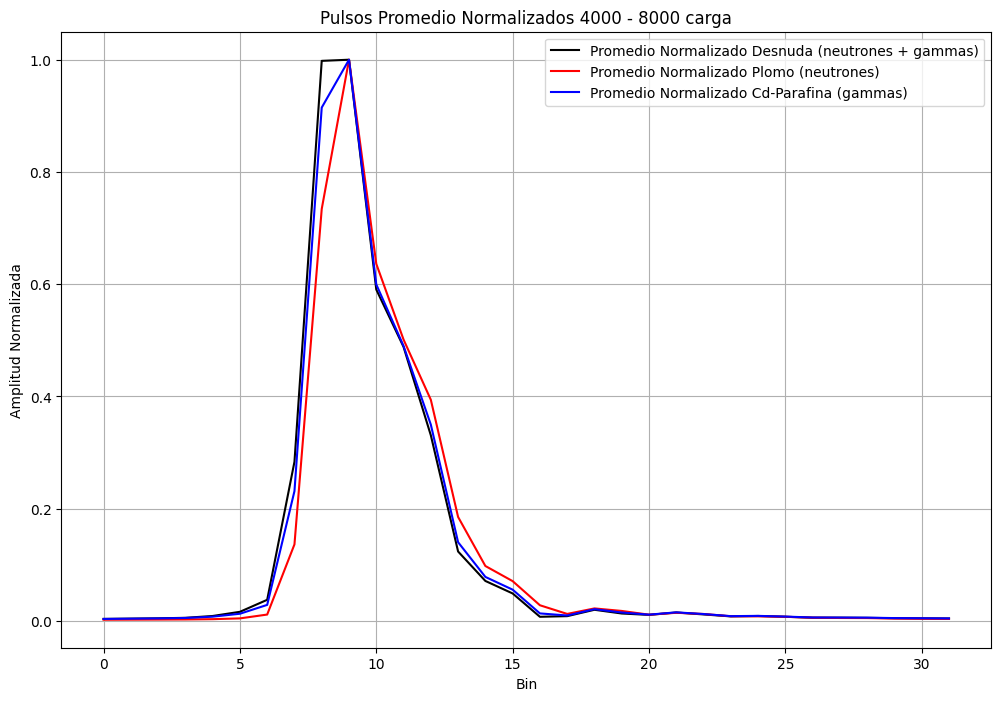

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import glob

# Función para cargar los datos de los archivos y calcular el promedio de los pulsos
def load_and_calculate_average_pulse_from_directory(directory):
    """
    Loads pulse data from CSV files in the specified directory, calculates the average pulse for each file, 
    and returns an array of average pulses.
    Args:
        directory (str): The path to the directory containing the CSV files. The files should be named with 
                         the pattern '*fuente_pulsos.csv'.
    Returns:
        np.ndarray: An array where each element is the average pulse calculated from a corresponding CSV file.
    """
    files = sorted(glob.glob(f"{directory}/*fuente_pulsos.csv"))
    average_pulses = []
    
    for file in files:
        data = np.loadtxt(file, delimiter=',', dtype=np.int32)
        average_pulse = np.mean(data, axis=0)  # Calcular el promedio de los pulsos
        average_pulses.append(average_pulse)  # Agregar el promedio a la lista
        
    return np.array(average_pulses)

# Función para normalizar pulsos
def normalize_pulses(pulses):
    """
    Normalize the given pulses by dividing each pulse by its maximum absolute value.

    Parameters:
    pulses (numpy.ndarray): A 2D array where each row represents a pulse.

    Returns:
    numpy.ndarray: A 2D array of the same shape as `pulses`, where each pulse is normalized.
    """
    return pulses / np.max(np.abs(pulses), axis=1, keepdims=True)

# Cargar los promedios de las diferentes configuraciones
average_pulses = load_and_calculate_average_pulse_from_directory("AmBe_desnuda")
average_pulses_plomo = load_and_calculate_average_pulse_from_directory("AmBe_plomo")
average_pulses_cdparafinab = load_and_calculate_average_pulse_from_directory("AmBe_cdparafinab")

# Normalizar los pulsos promedio
normalized_average_pulses = normalize_pulses(average_pulses)
normalized_average_pulses_plomo = normalize_pulses(average_pulses_plomo)
normalized_average_pulses_cdparafinab = normalize_pulses(average_pulses_cdparafinab)

# Crear el gráfico
plt.figure(figsize=(12, 8))

x_values = np.arange(len(normalized_average_pulses[0]))  

plt.plot(x_values, np.mean(normalized_average_pulses, axis=0), label='Promedio Normalizado Desnuda (neutrones + gammas)', color='black', linestyle='-')
plt.plot(x_values, np.mean(normalized_average_pulses_plomo, axis=0), label='Promedio Normalizado Plomo (neutrones)', color='red', linestyle='-')
plt.plot(x_values, np.mean(normalized_average_pulses_cdparafinab, axis=0), label='Promedio Normalizado Cd-Parafina (gammas)', color='blue', linestyle='-')

plt.title('Pulsos Promedio Normalizados 4000 - 8000 carga')
plt.xlabel('Bin')
plt.ylabel('Amplitud Normalizada')
plt.grid()
plt.legend()
plt.show()

## Análisis estadístico de los datos

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gc

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
# Función para cargar los datos desde múltiples archivos
def cargar_datos(archivos_neutrones, archivos_gammas):
    """
    Carga y procesa datos de archivos de neutrones y gammas.
    Args:
        archivos_neutrones (list of str): Lista de rutas de archivos que contienen datos de neutrones.
        archivos_gammas (list of str): Lista de rutas de archivos que contienen datos de gammas.
    Returns:
        tuple: Una tupla que contiene:
            - data (numpy.ndarray): Arreglo con los datos combinados de neutrones y gammas.
            - labels (numpy.ndarray): Arreglo con las etiquetas correspondientes (1 para neutrones, 0 para gammas).
    """
    pulsos_neutrones = []
    pulsos_gammas = []
    
    # Cargar datos de neutrones
    for archivo in archivos_neutrones:
        datos = np.loadtxt(archivo, delimiter=',')
        pulsos_neutrones.append(datos)
    
    # Cargar datos de gammas
    for archivo in archivos_gammas:
        datos = np.loadtxt(archivo, delimiter=',')
        pulsos_gammas.append(datos)
    
    # Concatenar todos los pulsos de neutrones y gammas
    pulsos_neutrones = np.vstack(pulsos_neutrones)
    pulsos_gammas = np.vstack(pulsos_gammas)
    
    # Crear etiquetas (1 para neutrones, 0 para gammas)
    labels = np.array([1] * pulsos_neutrones.shape[0] + [0] * pulsos_gammas.shape[0])
    
    # Combinar los pulsos en un solo arreglo
    data = np.vstack((pulsos_neutrones, pulsos_gammas))
    
    return data, labels

archivos_neutrones = ['AmBe_plomo_random/fuente_pulsos.csv']  
archivos_gammas = ['AmBe_cdparafinab_random/fuente_pulsos.csv']

# Cargar los datos
data, labels = cargar_datos(archivos_neutrones, archivos_gammas)

# Dividir los datos en conjunto de entrenamiento y prueba 20-80
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [17]:
# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Análisis Estadístico Básico
print("Análisis estadístico de las características:")
print(pd.DataFrame(X_train).describe())

Análisis estadístico de las características:
                 0             1             2             3             4   \
count  1.600000e+05  1.600000e+05  1.600000e+05  1.600000e+05  1.600000e+05   
mean  -1.012523e-17 -1.136868e-17 -1.065814e-18 -6.572520e-18  1.350031e-17   
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00   
min   -3.290395e+00 -3.194561e+00 -3.010189e+00 -6.338863e+00 -6.361402e+00   
25%   -4.455794e-01 -4.237770e-01 -3.905690e-01 -3.804781e-01 -3.452783e-01   
50%   -5.765007e-02 -6.753340e-02 -7.621457e-02 -8.903536e-02 -8.927303e-02   
75%    2.871760e-01  2.887102e-01  2.381398e-01  2.024074e-01  1.155312e-01   
max    2.739913e+01  2.534451e+01  2.252237e+01  2.083008e+01  1.644867e+01   

                 5             6             7             8             9   \
count  1.600000e+05  1.600000e+05  1.600000e+05  1.600000e+05  1.600000e+05   
mean   1.536549e-17  1.261213e-17  2.167155e-17 -1.154632e-16 -9.223733e-17   
std   

#### Análisis de Correlación

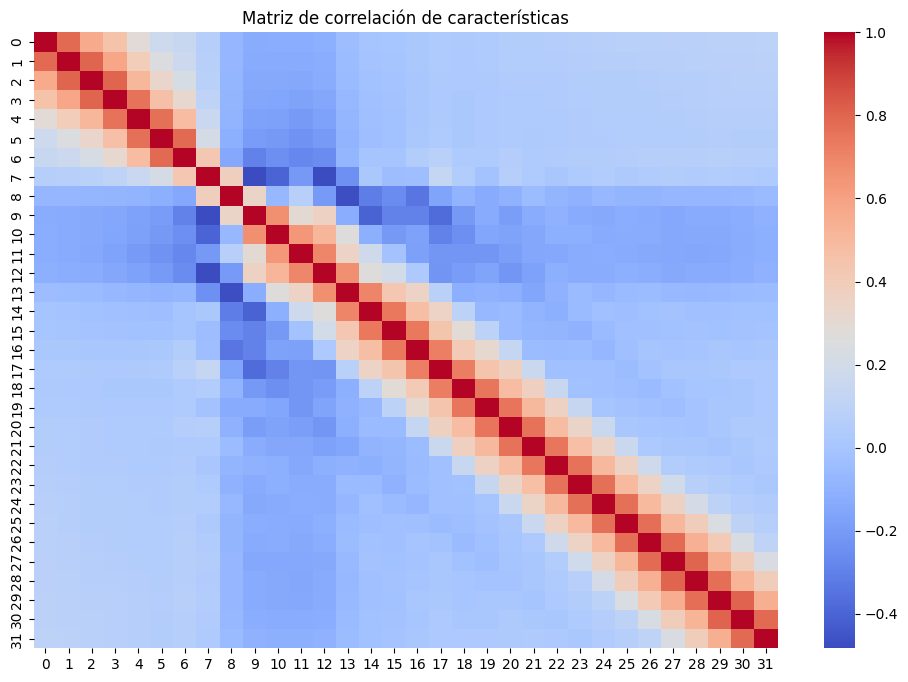

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(X_train).corr(), cmap='coolwarm', annot=False)
plt.title("Matriz de correlación de características")
plt.show()

## Comparando clasificadores simples

In [19]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier

#### Clasificadores a comparar

In [20]:
classifiers = {
    "LGBMClassifier": LGBMClassifier(),
    "SupportVectorMachine": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "BaggingClassifier": BaggingClassifier(),  
    "KNeighborsClassifier": KNeighborsClassifier(),
    "LinearSVC": LinearSVC(),
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "RidgeClassifier": RidgeClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "MLPClassifier": MLPClassifier(),  
    "XGBClassifier": XGBClassifier()
}

In [21]:
# Diccionario para almacenar resultados y características importantes
results = {"Classifier": [], "All Features": [], "Top 4 Features": []}
important_features = {}

#### Entrenar y evaluar cada clasificador

In [22]:
for clf_name, clf in classifiers.items():
    # Entrenar con todas las características
    clf.fit(X_train, y_train)
    y_pred_all = clf.predict(X_test)
    accuracy_all = accuracy_score(y_test, y_pred_all)
    
    # Si el clasificador tiene la propiedad de feature_importances_
    if hasattr(clf, "feature_importances_"):
        importances = clf.feature_importances_
    else:
        # Si no tiene feature_importances_, usar coef_ (como en regresión logística o SVM lineal)
        if hasattr(clf, "coef_"):
            importances = np.abs(clf.coef_[0])
        else:
            # Si el modelo no tiene ninguna de las dos, pasar a la siguiente iteración
            continue

    # Seleccionar las 4 características más importantes
    top_4_indices = np.argsort(importances)[-4:]
    important_features[clf_name] = top_4_indices

    # Entrenar con las 4 características más importantes
    X_train_4 = X_train[:, top_4_indices]
    X_test_4 = X_test[:, top_4_indices]
    
    clf.fit(X_train_4, y_train)
    y_pred_4 = clf.predict(X_test_4)
    accuracy_4 = accuracy_score(y_test, y_pred_4)

    # Almacenar los resultados
    results["Classifier"].append(clf_name)
    results["All Features"].append(accuracy_all)
    results["Top 4 Features"].append(accuracy_4)

    # Liberar memoria del clasificador
    del clf
    gc.collect()

[LightGBM] [Info] Number of positive: 80007, number of negative: 79993
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500044 -> initscore=0.000175
[LightGBM] [Info] Start training from score 0.000175
[LightGBM] [Info] Number of positive: 80007, number of negative: 79993
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500044 -> initscore=0.000175
[Lig

/home/said/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/said/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/said/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/said/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Visualización de accuracies para cada clasificador para todas las features y las 4 mejores features de cada uno

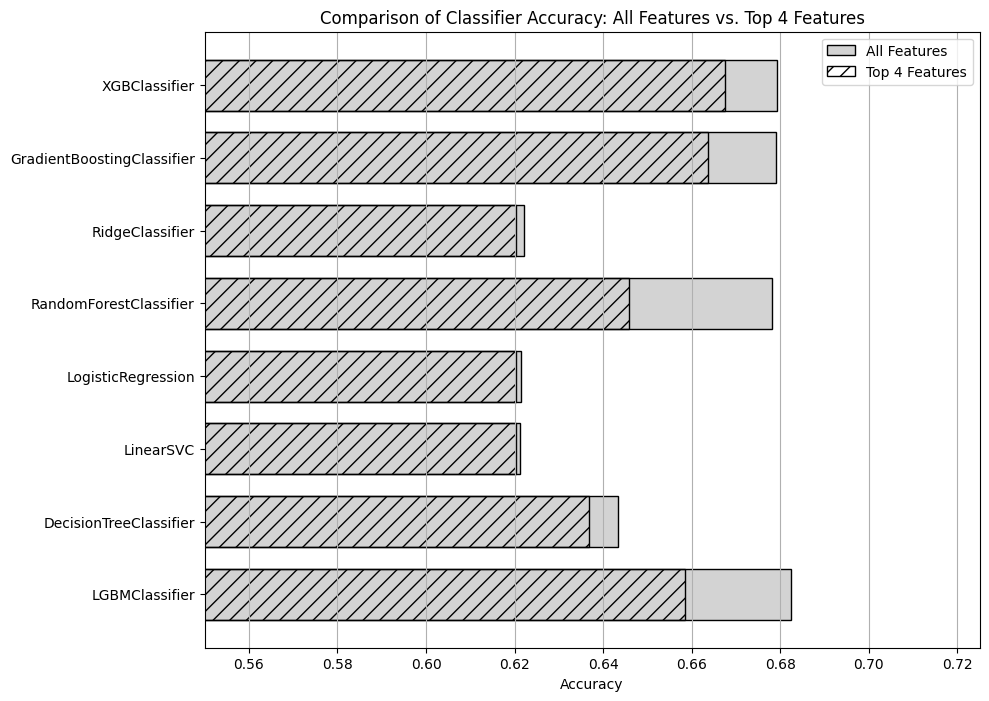

In [23]:
x = np.arange(len(results["Classifier"]))
width = 0.7

fig, ax = plt.subplots(figsize=(10, 8))

bars_all = ax.barh(x, results["All Features"], height=width, color='lightgrey', edgecolor='black', label='All Features')

bars_top4 = ax.barh(x, results["Top 4 Features"], height=width, color='none', edgecolor='black', hatch='//', label='Top 4 Features')

ax.set_yticks(x)
ax.set_yticklabels(results["Classifier"], fontsize=10)
ax.set_xlabel("Accuracy")
ax.set_title("Comparison of Classifier Accuracy: All Features vs. Top 4 Features")
ax.legend()

plt.grid(axis='x')
plt.xlim(0.55, 0.725)
plt.show()

#### Características más importantes según todos los clasificadores entrenados

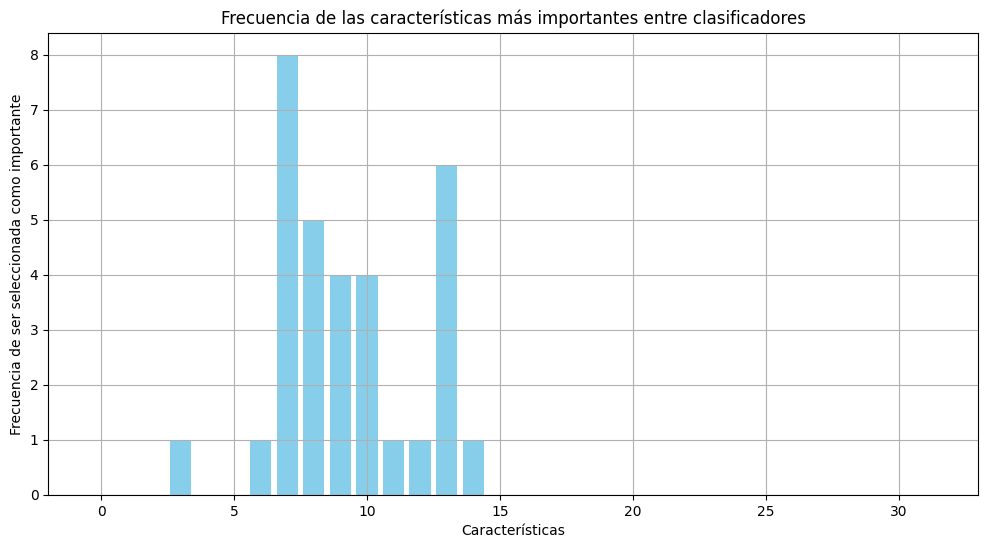

In [24]:
# Histograma de frecuencia de las características importantes
feature_counts = np.zeros(X_train.shape[1])

# Contar la frecuencia de cada característica
for clf_name, top_4 in important_features.items():
    for feature_idx in top_4:
        feature_counts[feature_idx] += 1

# Visualización de la frecuencia de características
plt.figure(figsize=(12, 6))
plt.bar(range(X_train.shape[1]), feature_counts, color='skyblue')
plt.xlabel('Características')
plt.ylabel('Frecuencia de ser seleccionada como importante')
plt.title('Frecuencia de las características más importantes entre clasificadores')
plt.grid()
plt.show()

## Ensemble

#### Voting Classifier usando los 3 clasificadores de mayor accuracy

In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [26]:
# Clasiciadores de mayor accuracy
classifiers = {
    "LGBM": LGBMClassifier(),
    "GB": GradientBoostingClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier()
}

In [27]:
# Crear el VotingClassifier
voting_clf = VotingClassifier(estimators=list(classifiers.items()), voting='soft')

#### Ajustar sus hiperparámetros

In [28]:
# param_grid = {
#     'LGBM__n_estimators': [50, 100, 200],
#     'LGBM__learning_rate': [0.01, 0.1, 0.2],
#     'LGBM__max_depth': [5, 7, 10],
#     'LGBM__num_leaves': [16, 32, 64],
#     'LGBM__min_child_samples': [20, 30, 50],
#     'LGBM__min_split_gain': [0.0, 0.01, 0.1],
#     'LGBM__lambda_l1': [0, 0.1, 0.5],
#     'LGBM__lambda_l2': [0, 0.1, 0.5],

#     'GB__n_estimators': [50, 100, 200],
#     'GB__learning_rate': [0.01, 0.1, 0.2],
#     'GB__max_depth': [3, 5, 7],
    
#     'RF__n_estimators': [50, 100, 200],
#     'RF__max_depth': [None, 10, 20],
#     'RF__min_samples_split': [2, 5, 10],
    
#     'XGB__n_estimators': [50, 100, 200],
#     'XGB__learning_rate': [0.01, 0.1, 0.2],
#     'XGB__max_depth': [3, 5, 7]
# }

In [29]:
# # Configurar GridSearchCV
# grid_search = GridSearchCV(estimator=voting_clf, param_grid=param_grid, 
#                            scoring='accuracy', cv=5, verbose=2, n_jobs=1)

In [30]:
# Ajustar el modelo
# grid_search.fit(X_train, y_train)
voting_clf.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 80007, number of negative: 79993
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500044 -> initscore=0.000175
[LightGBM] [Info] Start training from score 0.000175


VotingClassifier(estimators=[('LGBM', LGBMClassifier()),
                             ('GB', GradientBoostingClassifier()),
                             ('RF', RandomForestClassifier()),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [31]:
# Obtener los mejores parámetros
# print("Mejores parámetros:", grid_search.best_params_)

In [32]:
# Nuestro voting sera el de los mejores parametros
# voting_clf = grid_search.best_estimator_

In [33]:
y_pred_clf = voting_clf.predict(X_test)
accuracy_clf = accuracy_score(y_test, y_pred_clf)
y_pred_clf_proba = voting_clf.predict_proba(X_test)[:, 1] 
roc_auc_clf = roc_auc_score(y_test, y_pred_clf_proba)

In [34]:
# Mostrar resultados
print(f"Voting Classifier:")
print(f"Accuracy: {accuracy_clf:.4f}")
print("Informe de Clasificación:")
print(classification_report(y_test, y_pred_clf, target_names=["Gamma", "Neutron"]))
print(f"ROC AUC: {roc_auc_clf:.4f}")

Voting Classifier:
Accuracy: 0.6836
Informe de Clasificación:
              precision    recall  f1-score   support

       Gamma       0.67      0.72      0.69     20007
     Neutron       0.70      0.65      0.67     19993

    accuracy                           0.68     40000
   macro avg       0.68      0.68      0.68     40000
weighted avg       0.68      0.68      0.68     40000

ROC AUC: 0.7840


#### Predecir sobre `desnuda` y `desnuda_random`

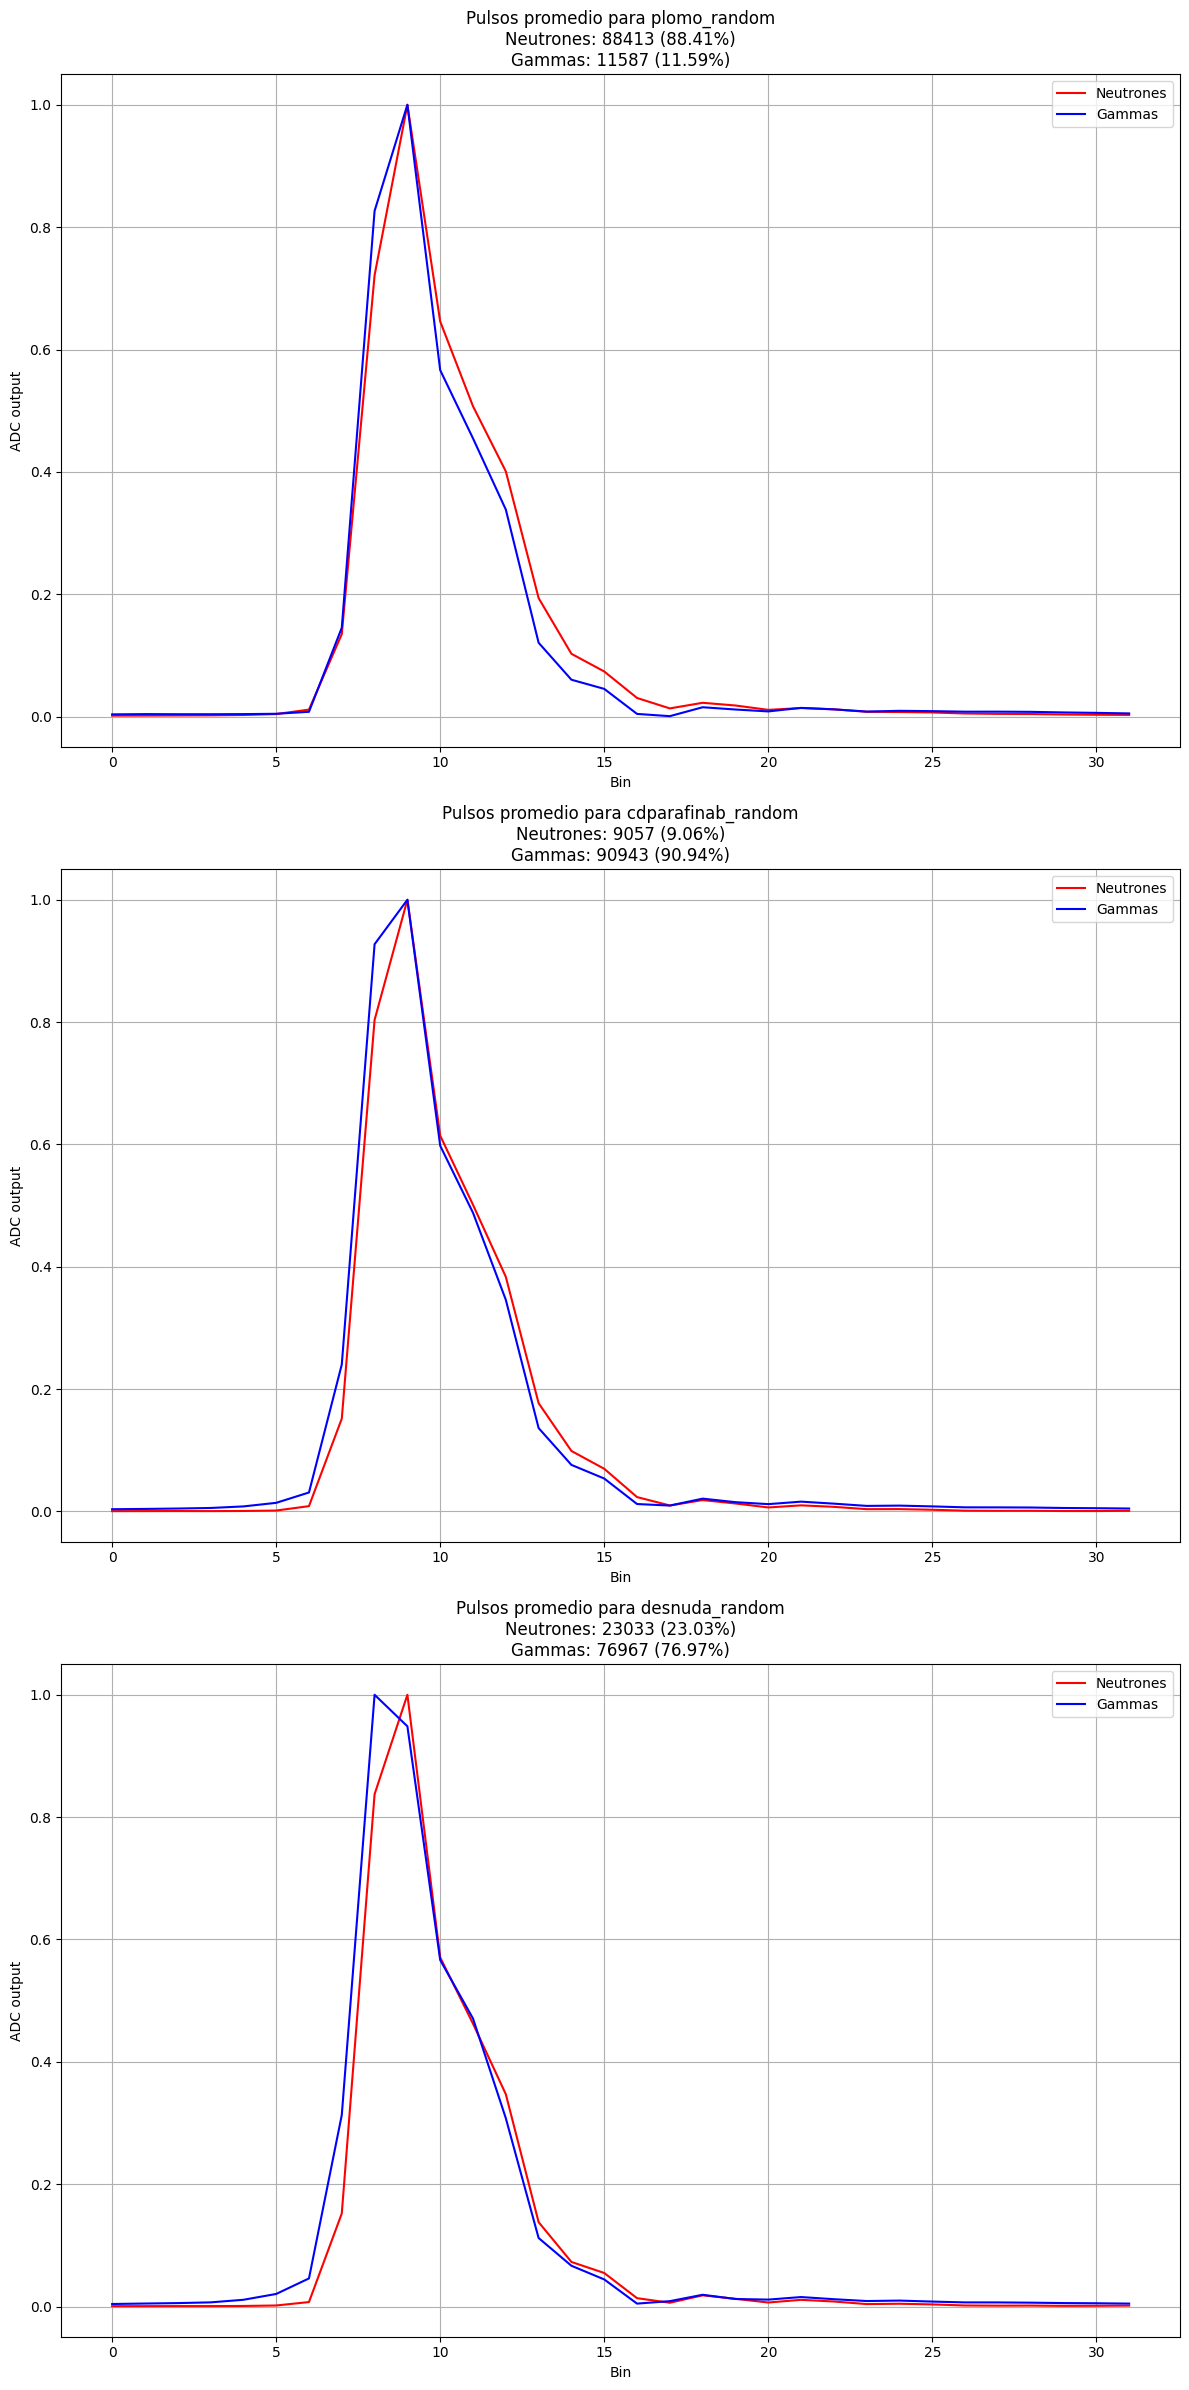

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def load_and_predict(file, model, scaler):
    """
    Cargar datos de un archivo, preprocesar con un scaler y realizar predicciones con un modelo.
    
    Parámetros:
    file (str): Ruta del archivo con los datos.
    model: El modelo de machine learning entrenado.
    scaler: El scaler ajustado para preprocesar los datos.
    
    Retorna:
    neutron_pulses: Pulsos de neutrones predichos.
    gamma_pulses: Pulsos de gammas predichos.
    """
    # Cargar datos
    data = np.loadtxt(file, delimiter=',')
    
    # Escalar los datos con el scaler ajustado
    data_scaled = scaler.transform(data)
    
    # Obtener las predicciones
    y_pred_all = model.predict(data_scaled)

    data_descaled = scaler.inverse_transform(data_scaled)

    # Separar pulsos de neutrones (1) y gammas (0)
    neutron_pulses = data_descaled[y_pred_all == 1]
    gamma_pulses = data_descaled[y_pred_all == 0]
    
    return neutron_pulses, gamma_pulses

# Modelo y scaler ya entrenados
best_model = voting_clf

# Archivos con los datos de entrada
files = {
    'plomo_random': 'AmBe_plomo_random/fuente_pulsos.csv',
    'cdparafinab_random': 'AmBe_cdparafinab_random/fuente_pulsos.csv',
    'desnuda_random': 'AmBe_desnuda_random/fuente_pulsos.csv'
}

# Diccionario para almacenar los pulsos
results = {}

for name, file in files.items():
    neutron_pulses, gamma_pulses = load_and_predict(file, best_model, scaler)
    results[name] = {
        'neutron_pulses': neutron_pulses,
        'gamma_pulses': gamma_pulses
    }

# Crear subplots (3 filas y 1 columna)
fig, axs = plt.subplots(3, 1, figsize=(12, 24))

for i, (name, data) in enumerate(results.items()):
    neutron_mean_pulses = np.mean(data['neutron_pulses'], axis=0)
    gamma_mean_pulses = np.mean(data['gamma_pulses'], axis=0)

    neutron_mean_pulses_normalized = neutron_mean_pulses / np.max(neutron_mean_pulses)
    gamma_mean_pulses_normalized = gamma_mean_pulses / np.max(gamma_mean_pulses)

    # Plot de neutrones y gammas
    axs[i].plot(neutron_mean_pulses_normalized, color='red', label='Neutrones')
    axs[i].plot(gamma_mean_pulses_normalized, color='blue', label='Gammas')
    
    # Calcular y mostrar cantidad y porcentaje
    num_neutrons = data['neutron_pulses'].shape[0]
    num_gammas = data['gamma_pulses'].shape[0]
    total = num_neutrons + num_gammas
    neutron_percentage = (num_neutrons / total) * 100
    gamma_percentage = (num_gammas / total) * 100

    axs[i].set_title(f'Pulsos promedio para {name}\n'
                     f'Neutrones: {num_neutrons} ({neutron_percentage:.2f}%)\n'
                     f'Gammas: {num_gammas} ({gamma_percentage:.2f}%)')
    axs[i].set_xlabel('Bin')
    axs[i].set_ylabel('ADC output')
    axs[i].grid()
    axs[i].legend()

plt.tight_layout()
plt.show()


#### Guardar el modelo

In [36]:
import os
from joblib import dump

model_dir = 'models'
model_filename = 'voting_classifier_model.joblib'

# Crear la carpeta si no existe
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Guardar el modelo en la carpeta models
dump(voting_clf, os.path.join(model_dir, model_filename))

print(f"Modelo guardado en {os.path.join(model_dir, model_filename)}")

Modelo guardado en models/voting_classifier_model.joblib
